In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
plt.style.use('ggplot')

In [5]:
all_checks = pd.read_csv('July1505Data.csv')
checks = all_checks[all_checks['Category']!='No Data']

In [9]:
# Total amount in this fund
all_checks.amount.astype(float).sum()

22463428.359999999

In [10]:
checks.amount.astype(float).sum()

22463428.359999999

# Strip whitespace and make case insensitive

In [41]:
checks['Purchase'] = checks.Purchase.map(lambda x: x if type(x)!=str else x.lower())
checks['Category'] = checks.Category.map(lambda x: x if type(x)!=str else x.lower())

In [42]:
checks['Purchase'] = checks['Purchase'].str.strip()
checks['Category'] = checks['Category'].str.strip()

In [43]:
checks = checks.fillna('No data')

# De-duplication

In [44]:
checks.Purchase.replace('ballistics labs', 'ballistics lab', inplace=True)
checks.Purchase.replace('car repair and seizure', 'car repair', inplace=True)
checks.Purchase.replace('file maker license', 'filemaker', inplace=True)
checks.Purchase.replace('gps kit', 'gps trackers', inplace=True)
checks.Purchase.replace('accurint', 'lexis nexis', inplace=True)
checks.Purchase.replace('k9 training', 'k9s', inplace=True)
checks.Purchase.replace('gps kit', 'gps trackers', inplace=True)
checks.Purchase.replace('repair for seized vehicles', 'car repair', inplace=True)
checks.Purchase.replace('repair of seized vehicles', 'car repair', inplace=True)
checks.Purchase.replace('server', 'server purchase', inplace=True)
checks.Purchase.replace('raid apparel', 'raid jacket', inplace=True)
checks.Purchase.replace('seized vehicles', 'car repair', inplace=True)
checks.Purchase.replace('seized car repair', 'car repair', inplace=True)
checks.Purchase.replace('seized cars', 'car repair', inplace=True)
checks.Purchase.replace('undercover car purchase', 'undercover car', inplace=True)

In [45]:
# do analysis only on checks for which we have the 

In [64]:
checks.amount.replace(to_replace='No data', value=0, inplace=True)

# Group by purchase type

In [65]:
checks['Purchase'].unique()

array(['computer purchase', 'server purchase', 'at&t trunking',
       'enterprise', 'phones', 'lexis nexis',
       'independent audit 1505/657 funds', 'alpr', 'ocd vision', 'k9s',
       'car repair', 'subscription to accurint web access',
       'accurint public record web access for ocd drug investigators',
       'ideoa training fee for 40 officers',
       'repairs for forefeited vehicles',
       'unclear, "utilized during narcotic related investigations"',
       'hp monitors, "data color spyder3"', 'star witness', 'filemaker',
       'swat equipment', 'training equipment', '49 vehicles',
       'raid jacket', 'gps trackers', 'black widow surveillance',
       'gps air time', 'camera equipment', 'stingray', 'postal equipment',
       'pods', 'gang intelligence reporting', 'audio / video supplies',
       'trunking', 'redacted', 'pinhole cameras', 'pinhole camera',
       'vehicle repairs', 't1 internet access', 'hard drives',
       'pen-link pen registers', 'vehicle repair', '

In [66]:
purchase_obj = checks.groupby('Purchase')

In [67]:
amounts_spent = purchase_obj.amount.agg('sum')

In [68]:
amounts = pd.DataFrame(amounts_spent)

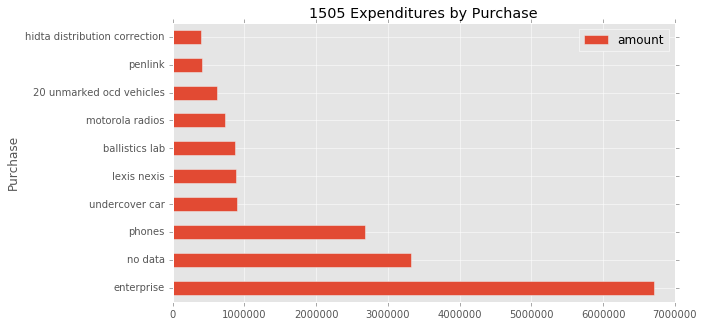

In [69]:
amounts.sort_values('amount', ascending=False)[0:10].plot(kind='barh', figsize=(9,5), title='1505 Expenditures by Purchase')

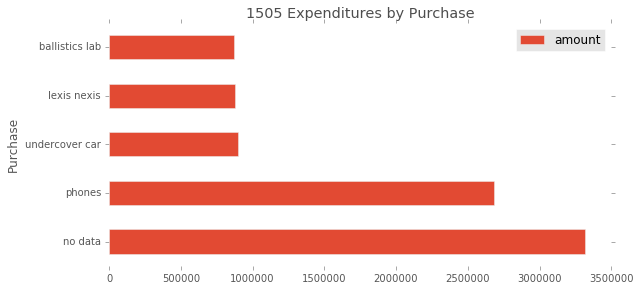

In [70]:
import matplotlib
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
a = 0.7

# Remove grid lines
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)
 
# Title
ax.set_title(ax.get_title(), fontsize=36, alpha=a, ha='left')
plt.subplots_adjust(top=0.8)
# ax.title.set_position((0.5,1.08))
 
# Axis labels
# ax.xaxis.set_label_position('bottom')
# ylab = 'Amount Seized (USD)'
# ax.set_ylabel(ylab, fontsize=20, alpha=a, ha='left')

# People don't understand scientific notation
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

amounts.sort_values('amount', ascending=False)[1:6].plot(ax=ax, kind='barh', figsize=(9,5), title='1505 Expenditures by Purchase')

In [71]:
amounts.sort('amount')

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,amount
Purchase,
gas credit card charges,33.17
reimbursement for city sticker,35.42
at&t,188.67
trunking line,256.93
x2 server rack power strips,374.66
real estate database,400.00
hotline services,478.40
membership renewal 12 officers,600.00
pen,932.11


In [72]:
amounts.sum()

amount    22463428.36
dtype: float64

# Group by routine/surveillance classification

In [73]:
class_obj = checks.groupby('Category')

In [74]:
amounts_by_class = class_obj.amount.agg('sum')

In [75]:
amounts_category = pd.DataFrame(amounts_by_class)

In [76]:
amounts_category['Category'] = amounts_category.index

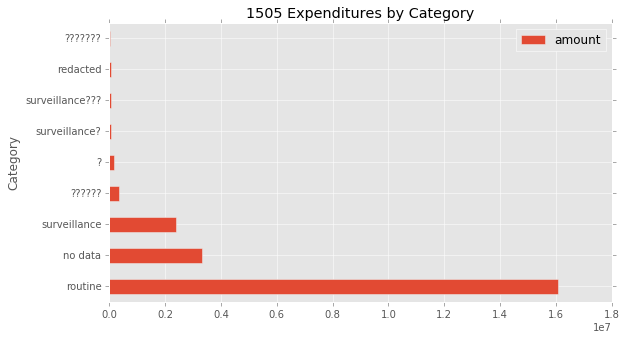

In [77]:
amounts_category.sort_values('amount', ascending=False)[0:10].plot(kind='barh', figsize=(9,5), title='1505 Expenditures by Category')

In [78]:
amounts_category

,amount,Category
Category,,
?,146629.74,?
??????,355374.45,??????
???????,32722.34,???????
no data,3318409.22,no data
redacted,48380.85,redacted
routine,16081859.94,routine
surveillance,2374460.22,surveillance
surveillance?,54591.60,surveillance?
surveillance???,51000.00,surveillance???


In [86]:
amounts_category.amount.sum()

22463428.359999992

In [84]:
16081859.94 + 2374460.22

18456320.16

In [58]:
checks_to_plot_sur = checks[checks.Category == 'surveillance']
checks_to_plot_rou = checks[checks.Category == 'routine']

In [64]:
checks_to_plot = checks_to_plot_sur.append(checks_to_plot_rou)
class_obj = checks.groupby('Category')
amounts_by_class = class_obj.amount.agg('sum')
amounts_category = pd.DataFrame(amounts_by_class)
amounts_category['Category'] = amounts_category.index

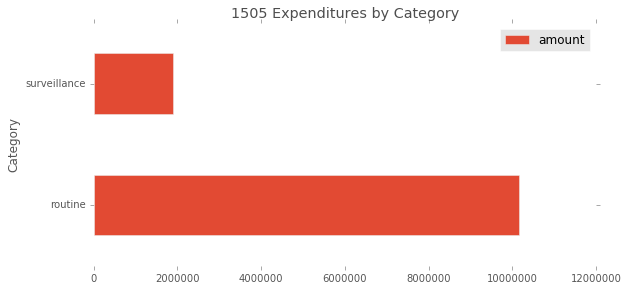

In [68]:
import matplotlib
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
a = 0.7

# Remove grid lines
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)
 
# Title
ax.set_title(ax.get_title(), fontsize=36, alpha=a, ha='left')
plt.subplots_adjust(top=0.8)
# ax.title.set_position((0.5,1.08))
 
# Axis labels
# ax.xaxis.set_label_position('bottom')
# ylab = 'Amount Seized (USD)'
# ax.set_ylabel(ylab, fontsize=20, alpha=a, ha='left')

# People don't understand scientific notation
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

amounts_category.sort_values('amount', ascending=False)[0:10].plot(ax=ax, kind='barh', figsize=(9,5), title='1505 Expenditures by Category')


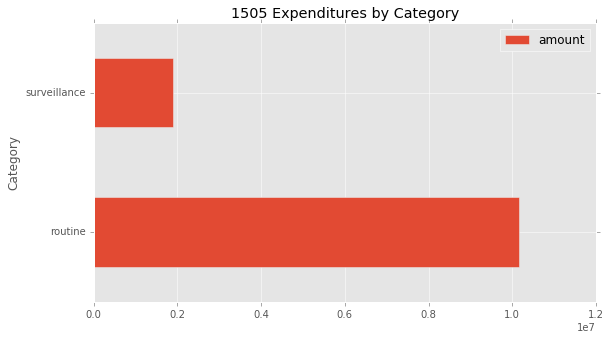

In [26]:
result_by_cat = amounts_category.sort_values('amount', ascending=False)[0:10]

In [17]:
checks.to_html('checks.html')